In [10]:
'''
This notebook is used for testing the network, 
SINGLE INFERENCE - for testing random google images
TESTING IMAGES - running the testing sets through the model
            and evaluating the results

@Author: Aaron Ward
'''
import tensorflow as tf
import os, os.path
import numpy as np
from numpy import ndarray
import skimage
from skimage import transform, exposure
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

print('Imported libraries...')

Imported libraries...


In [11]:
TRAINED_MODEL = os.getcwd() + '/output/'

IMAGE_PATH = os.getcwd() + '/test/happy.jpg'
# IMAGE_PATH = os.getcwd() + '/test/anger1.jpg'
# IMAGE_PATH = os.getcwd() + '/test/surprise.jpg'
# IMAGE_PATH = os.getcwd() + '/test/neutral.jpg'
# IMAGE_PATH = os.getcwd() + '/test/sad.jpg'
# IMAGE_PATH = os.getcwd() + '/test/fear.jpg'


INFO:tensorflow:Restoring parameters from ./output/trained_model.ckpt
Original Image


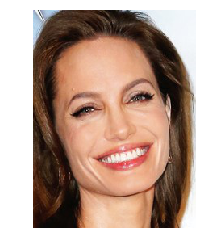

Resized and Grayscaled Image


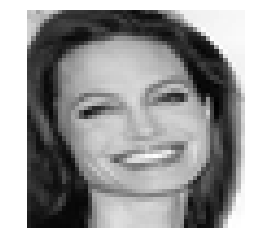

Predicted: Happy


In [12]:
sess = tf.Session('', tf.Graph())
with sess.graph.as_default():
    # Read meta graph and checkpoint to restore tf session
    saver = tf.train.import_meta_graph(TRAINED_MODEL + "trained_model.ckpt.meta")
    saver.restore(sess, "./output/trained_model.ckpt")

######################################### SINGLE INFERENCE ##################################################################
    '''
        Test single images from google at a time with the model
        @NOTE: Will not perform as well because images aren't cropped around the facial area
    '''
    #Read a single image from a file.
    print('Original Image')
    img=mpimg.imread(IMAGE_PATH)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    img = np.array(img)

    image = Image.open(IMAGE_PATH)
    image = image.convert('L')
    image = image.resize((50, 50), Image.ANTIALIAS)
        
    print('Resized and Grayscaled Image')
    imgplot = plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    
    
    image = np.expand_dims(np.array(image), axis = 0)
                       
    # Get pointers to relevant tensors in graph
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("X_placeholder:0") # input
    y = graph.get_tensor_by_name("Y_placeholder:0") # label - not using this, unless we want to calculate loss
    is_training = graph.get_tensor_by_name( "is_training:0" ) 
    prediction = graph.get_tensor_by_name( "Prediction:0" ) # these will be results

    classification = sess.run(prediction, feed_dict = {x: image, is_training : True})   
    classes = np.argmax( classification, axis = 1 ) # add highest probability result to classes

    if   classes[0] == 0:
        print('Predicted: Angry')
    elif classes[0] == 1:
        print('Predicted: Fear')
    elif classes[0] == 2:
        print('Predicted: Happy')
    elif classes[0] == 3:
        print('Predicted: neutral')
    elif classes[0] == 4:
        print('Predicted: sad')
    elif classes[0] == 5:
        print('Predicted: suprised')




#  ################################# TESTING IMAGES ##################################################################        
    '''
     This is for feed the entire testing set for each class into the model to 
     calculate the misclassifications

    '''
# TESTING_DIR = os.getcwd() + '/data/testing/5/'
# num_angry = 0
# num_happy = 0
# num_fear = 0
# num_neutral = 0
# num_sad = 0
# num_suprise = 0
# list = os.listdir(TESTING_DIR)
# for file in list:    
#     image = Image.open(TESTING_DIR + file)
#     image = image.convert('L')
#     image = image.resize((50, 50), Image.ANTIALIAS)
#     image = np.expand_dims(np.array(image), axis = 0)

#     classification = sess.run(prediction, feed_dict = {x: image, is_training : True})   
#     classes = np.argmax( classification, axis = 1 ) # add highest probability result to classes

#     if   classes[0] == 0:
#         num_angry += 1
#     elif classes[0] == 1:
#         num_fear += 1
#     elif classes[0] == 2:
#         num_happy+= 1
#     elif classes[0] == 3:
#         num_neutral += 1
#     elif classes[0] == 4:
#         num_sad += 1
#     elif classes[0] == 5:
#         num_suprise += 1

# print('Angry -', num_angry)
# print('Fear -', num_fear)
# print('Happy -', num_happy)
# print('Netral -', num_neutral)
# print('Sad -', num_sad)
# print('Suprise -', num_suprise)


    #  #######################################################################################################################